# The Effects of COVID-19 on Bike Riding Behavior in Los Angeles and the City of Philadelphia
## by Salman Mostafa

## Investigation Overview

I investigate the effects of COVID-19 on the bike riding behavior in both cities before and during/after the quarantine. I specify the before period as 2020 q1, and the after period as 2020 q2 and q3.  

## Dataset Overview

The dataset contains data about individual bike rides in Los Angeles(LA) and The City of Philadelphia(PA) from Jan, 2020 to Sept, 2020. The dataset is collected from a bike sharing program in both cities. The collected data from trips in LA and PA has the same structure since the cities partner with Bicycle Transit Systems.

For more information about the data and the attributes, please visit the following URLs:

Los Angeles: https://bikeshare.metro.net/about/data/  
Philadelphia: https://www.rideindego.com/about/data/

In [16]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import glob

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [17]:
sb.set()

In [18]:
# load in the dataset into a pandas dataframe
def multiple_dfs_reader(path, all_files,city,quarter=1):
    #Reads the csv files in the file path and returnes a concatenated df of all of them. Adds the quarter and city in each df
    
    li = []

    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0)
        df['quarter'] = 'q'+str(quarter)
        df['city'] = city
        quarter = quarter +1
        li.append(df)
    return(pd.concat(li, axis=0, ignore_index=True))

In [19]:
#Reading LA quarter files
path = r'C:\Users\salma\Salman Mostafa - Egypt FWD Advanced Data Analysis\Salman Mostafa - Communicating LA and PA Bike Data Findings\LA csv files'
all_files = glob.glob(path + "/*.csv")
city = 'LA'
la_df = multiple_dfs_reader(path, all_files, city)

#Reading PA quarter files
path = r'C:\Users\salma\Salman Mostafa - Egypt FWD Advanced Data Analysis\Salman Mostafa - Communicating LA and PA Bike Data Findings\PA csv files'
all_files = glob.glob(path + "/*.csv")
city = 'PA'
pa_df = multiple_dfs_reader(path, all_files, city)

In [20]:
#Concat both cities dfs
dfs = [la_df, pa_df]
comb_df = pd.concat(dfs,axis=0, ignore_index=False) #trip_id is our index here
comb_df = comb_df.query('duration <= 60') #60 mins was an appropriate upper limit for the data (discussed more in exploratory analysis)

In [21]:
#Before and after COVID-19 datasets
before_covid_df = comb_df[comb_df['quarter']=='q1'] # df1
df1 = before_covid_df
after_covid_df = comb_df[(comb_df['quarter']=='q2')|(comb_df['quarter']=='q3')] #df2
df2 = after_covid_df

In [22]:
#Visualization Functions
def annotate_bar_subplots(axis):
    #Annotates bar subplots
    for p in axis.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        axis.annotate('{:.0%}'.format(height/100), (x+0.25, y + height+1))
        
def bar_subplots(suptitle, df1, df2, column_name, title1, title2):
    #plots two bar subplots from two different dfs with a suptitle and a title for each of them
    #axes code concept np.arrange from Robbie at https://stackoverflow.com/questions/43673659/matplotlib-not-showing-first-label-on-x-axis-for-the-bar-plot
    fig, axes = plt.subplots(1,2, figsize=(9, 6))
    plt.suptitle(suptitle, y = 1.1)

    series = df1[column_name].value_counts() / len(df1)
    axes[0].bar(np.arange(len(series.index)), series*100) 
    axes[0].set_title(title1)
    axes[0].set_ylabel('%')
    axes[0].set_xticks(np.arange(len(series)))
    axes[0].set_xticklabels(series.index);
    axes[0].set_ylim([0,100]);
    
    annotate_bar_subplots(axes[0])
    
    series = df2[column_name].value_counts()/len(df2)
    axes[1].bar(np.arange(len(series.index)), series*100) 
    axes[1].set_title(title2)
    axes[1].set_ylabel('%')
    axes[1].set_xticks(np.arange(len(series)))
    axes[1].set_xticklabels(series.index);
    axes[1].set_ylim([0,100]);

    
    annotate_bar_subplots(axes[1])
    
    fig.tight_layout() 

In [23]:
def pie_subplots(suptitle, df1, df2, column_name, title1, title2, labels):
    #plots two pie charts from two different dfs with a suptitle and a title for each of them 
    fig, axes = plt.subplots(1,2, figsize =(8,8), sharey = True)
    plt.suptitle(suptitle)

    wedges = df1[column_name].value_counts()/len(df1)
    labels = labels
    axes[0].pie(wedges, autopct='%1.1f%%', labels =labels, startangle=90,counterclock =False, radius= 2);
    axes[0].set_title(title1, pad =90)


    wedges = df2[column_name].value_counts()/len(df2)
    axes[1].pie(wedges, autopct='%1.1f%%', labels =labels, startangle=90,counterclock =False, radius= 2);
    axes[1].set_title(title2, pad =90)
    fig.tight_layout() #method idea from Joe Kington at https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

## LA bike rides go down...why?

What made me interested to look into this is the following visualization. The number of bike rides in LA decreased during/after COVID-19. So I decided to look at ride duration, bike types, and trip route to try to find out why.

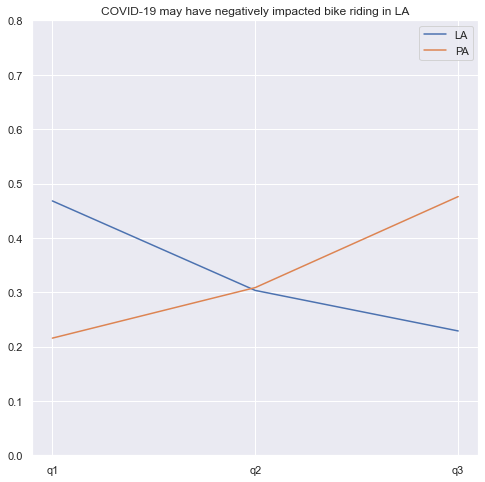

In [24]:
plt.figure(figsize=(8,8))
LA_df = comb_df[comb_df['city']=='LA']
PA_df = comb_df[comb_df['city']=='PA']
plt.plot(LA_df['quarter'].value_counts().sort_index()/len(LA_df), label = 'LA')
plt.plot(PA_df['quarter'].value_counts().sort_index()/len(PA_df), label = 'PA')
plt.ylim([0,0.8])
plt.legend();
plt.title('COVID-19 may have negatively impacted bike riding in LA');

In [25]:
LA_before_covid_df = before_covid_df[before_covid_df['city']=='LA']
PA_before_covid_df = before_covid_df[before_covid_df['city']=='PA']
LA_after_covid_df = after_covid_df[after_covid_df['city']=='LA']
PA_after_covid_df = after_covid_df[after_covid_df['city']=='PA']

## Riding to work/school

The most frequent ride duration in both cities is around 8 minutes. I came to the conclusion that most riders were riding to work/school because the most frequent ride duration for the whole dataset, before and after COVID, and before and after COVID in both cities is around 8 minutes. This sounds like a similar and frequent ride, probably to work or school

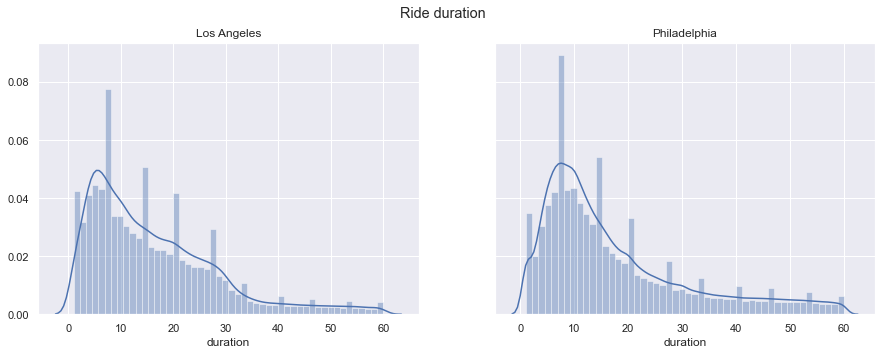

In [26]:
#code concept from piRSquared and Mark Ginsburg at https://stackoverflow.com/questions/45069828/how-to-plot-2-histograms-side-by-side?rq=1
LA_df = comb_df[comb_df['city']=='LA']
PA_df = comb_df[comb_df['city']=='PA']

fig, axes = plt.subplots(1,2, figsize =(15,5), sharey =True)
plt.suptitle("Ride duration")

sb.distplot(LA_df['duration'], ax=axes[0])

axes[0].set_title("Los Angeles")

sb.distplot(PA_df['duration'], ax=axes[1])

axes[1].set_title("Philadelphia");

## Consistency With a Hint of Activity in LA

In LA, Standard bikes were used more after COVID-19 than before it. In addition, smart bikes were used more after COVID-19. 

I suspected that people would be more interested in standard bikes during/after the quarantine because they need the excercise and the stress relief of physical activity. Electric bikes do not make the user exert as much power as standard bikes do. 

Also, The 5% increase in smart bikes is significant but as far as I know, smart bikes are just IoT devices and do not reduce the power exerted by the user, which adds to the point that people started to prefer using more physical energy during/after quarantine.

So, despite the number of rides going down in LA, the people who rode became a little more active.  

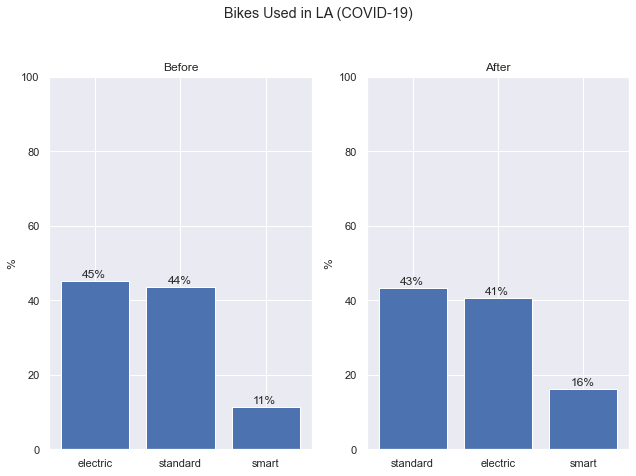

In [27]:
df1 = LA_before_covid_df
df2 = LA_after_covid_df
bar_subplots("Bikes Used in LA (COVID-19)", df1, df2, 'bike_type', "Before", "After")

## Why not go out and bike too? - PA said
Based on the graph below, people in Philadelphia prefer standard bikes COVID-19. However, It seems that other people wanted to try out bike riding to get out of the house during quarantine, and since they are starting out, they probably opted to use electric bikes, hence the almost-double of electric bike use. What makes this theory sound logical is the significant change in the trip routes as follows.

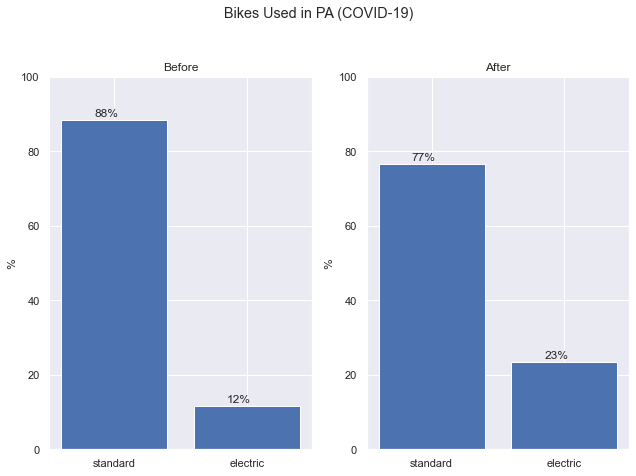

In [28]:
df1 = PA_before_covid_df
df2 = PA_after_covid_df
bar_subplots("Bikes Used in PA (COVID-19)", df1, df2, 'bike_type', "Before", "After")

## **Clue #1:**  
Looking at the ride duration distribution, and the types of bike Individuals used before and after COVID-19, we can conclude the following:

- LA and PA are using the bikes to drive to work or school.
    
- Most Individuals in LA were using bikes out of necesity or convenience. On the other hand, in PA, most people are biking regardless of having to go to work/school. They like the activity, hence the prominent use of standard bikes before and after COVID-19 and the increase in the number of riders.
    
- The second point could be an indicator of why the numbers decreased in LA. Most jobs became remote, so that removed the need for people to ride bikes. 

- New/Existing Individuals became a little more active in LA during/after COVID-19 than in PA. The increase happened in the number of standard bikes in LA, and happened in electric bikes in PA.

## No business anywhere but home!

These are two of the most interesting plots; Round trips more than double after COVID-19 in both cities! The first thought that comes to mind is that more people started to ride bikes during quarantine and they were doing round trips because they did not have a specific destination that they usually go to (since they don't bike often). This could also mean that existing riders started doing more round trips since they did not have to go to work as they used to. 

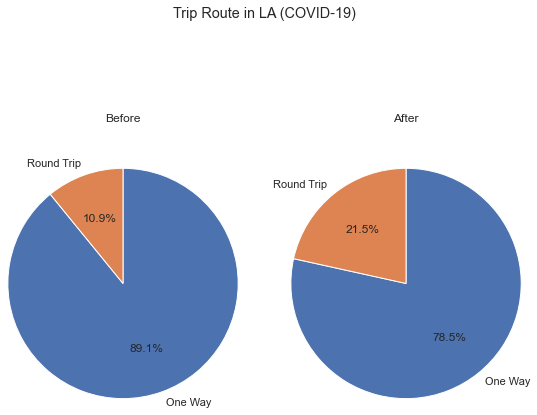

In [29]:
df1 = LA_before_covid_df
df2 = LA_after_covid_df
labels = 'One Way', 'Round Trip'
pie_subplots("Trip Route in LA (COVID-19)", df1, df2, 'trip_route_category',"Before","After", labels)

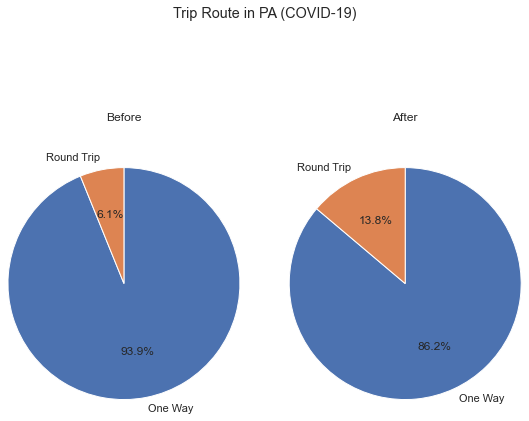

In [30]:
df1 = PA_before_covid_df
df2 = PA_after_covid_df
labels = 'One Way', 'Round Trip'
pie_subplots("Trip Route in PA (COVID-19)", df1, df2, 'trip_route_category',"Before","After", labels)

## **Clue #2:** 
- Both cities saw a big increase in the number of round trips but notice how the round-trip slice is bigger in LA.
- So, new individuals started riding during/after quarantine and/or some of the existing ones continued to ride but did round trips instead since they did not have to go to work as they used to.
- These two conclusions could be reasons why less people are riding bikes in LA 

## Discovered factors:

- Work/School becomming remote lowered the incentive to ride bikes in LA since the main reason was to go to work/school

- Quarantine increased interest in excercise in both cities but more so in PA than in LA

## **Other factors**
The factors we have discovered here are just two factors that could have impacted this downtrend in bike rides in LA. Here are two other factors to potentially consider in the future:
- **Weather conditions in both cities:** I imagine that since Philadelphia is in the north east, the weather in the Spring/Summer(qurantine period) is nicer than in LA, lowering the number of rides in LA and increasing them in PA. 


- **Most prominent types of jobs in both cities:** I know that LA has Silicon Valley and most Software Development jobs can be done from home. Maybe that is not the case in Philadelphia and more people are in essential roles where they need to physically be somewhere for. That would lower the number of rides in LA and increase them in PA as well by default.

## **Thank you!**

I hope this presentation provided some insight and value. I enjoyed studying this dataset!